In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data= pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# we are using income and spending score to cluster them
x= data.iloc[:,[3,4]]

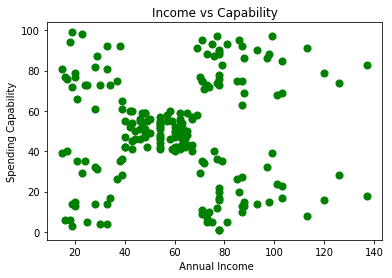

In [5]:
# visualising the data to see the distribution.
plt.scatter(x.iloc[:,0],x.iloc[:,1] , c= 'green', s= 50)
plt.title('Income vs Capability')
plt.xlabel(' Annual Income')
plt.ylabel('Spending Capability')
plt.show()

# Kmeans Cluster

k-means clustering aims to partition n observations into k clusters
 in which each observation belongs to the cluster with the nearest centroid,
 serving as a center of the cluster.
 
 
 What is random initialization trap??
 
Sometimes it’s quite possible that, we might be choosing a initial K center points in such a way
that the algorithm gives a false positive model.
 This can be avoided using K++ means.
 k-means++ is an algorithm for choosing the initial values
for the k-means clustering algorithm.

Steps in Algo:

Step 1 :- Decide on number of cluster you want. For this e.g, let’s take K = 2
Step 2 :- Based on the chosen cluster, identify the points as center points. In this case, identify any 2 points on the graph and mark them as center points (C1, C2).
Step 3 :- Now, for each data point, classify them into 1st or 2nd cluster based on the closest point. For e.g, a point of (2,5) may be closest to center C1 than to center C2. In this case, point (2,5) will be marked into a cluster which has a center point as C1.
Step 4 :- After classifying all data points into C1 or C2, now you will have few points which are close to C1 and rest are close to C2. Based on these points, calculate new center point for data points which were in C1 group. So, C1 will move to a new point. The same will happen to C2.
Step 5 :- Repeat Step 3, Step 4 until a point is reached where C1 & C2 don’t move any further!


What is WCSS??

Within Cluster Sum of Squares. For e.g, let’s take there are 3 clusters
That means, we have 3 center points (C1, C2, C3).
 Each data point falls into the zone of either C1 or C2 or C3. 
First we calculate the sum of squares of the distance of each data point in cluster 1 from their center point C1.
Let’s say there are 3 points in cluster 1 (c1p1, c1p2, c1p3).
[dist(C1, c1p1) ]² + [dist(C1, c1p2)]² + [dist(C1, c1p3)]². This is cluster 1 sum of squares.
Similarly we do the same for C2 & C3. Now, we add the sum of all 3 ‘clusters sum of squares’ to get WCSS.
******************************************

How to choose the right number of clusters? Elbow method??????????????????
WCSS always decreases with the increase in the number of clusters. However,
it should be noted that, the rate of drop in WCSS starts to drop as we increase the number of clusters.
 This would be our hint. We need to stop at the number of clusters from where the rate of drop in WCSS 
 doesn’t drop substantially (in other words, the rate of drop is very less).
 This is sometimes also termed as Elbow method.
"""

In [6]:
from sklearn.cluster import KMeans

In [7]:
wcss=[]
for i in range(1,11):
    km= KMeans(n_clusters= i, init= 'k-means++', n_init= 10, max_iter=300, random_state= 0)
    km.fit(x)
    wcss.append(km.inertia_)

"""
n_clusters : int, optional, default: 8
The number of clusters to form as well as the number of centroids to generate.
max_iter : int, default: 300
Maximum number of iterations of the k-means algorithm for a single run.
n_init : int, default: 10
Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
init : {‘k-means++’, ‘random’ or an ndarray}
Method for initialization, defaults to ‘k-means++’:

‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.

‘random’: choose k observations (rows) at random from data for the initial centroids.
"""

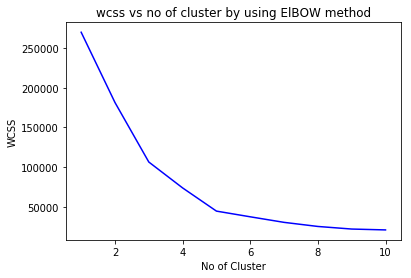

In [8]:
plt.plot(range(1,11), wcss, c='blue')
plt.xlabel('No of Cluster')
plt.ylabel('WCSS')
plt.title('wcss vs no of cluster by using ElBOW method')
plt.show()

Now , we can judge we have K=5 from where drop is significantly low.

In [9]:
#fitting with k= 5
X= data.iloc[:,[3,4]].values
km= KMeans(n_clusters= 5, init= 'k-means++', n_init= 10, max_iter=300, random_state= 0)
y_kmeans= km.fit_predict(X)

In [10]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [11]:
#cluster centers
km.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

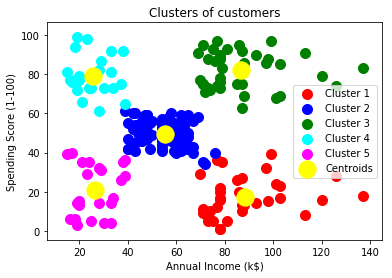

In [12]:
#Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
#taking x as rows where cluster no is 0 and columns as annual salary and y with row with cluster 0 and columns with spending cap.
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [13]:
a= np.append(X,y_kmeans.reshape(200,1), axis=1)

In [14]:
d= pd.DataFrame(data=a, columns= ['age', 'capability', 'cluster_no'])

In [15]:
d.head()

,age,capability,cluster_no
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


# Heirachial Clustering


2 typs of heirachical clustering:
    Agglomerative : Bottom up approcach starting from down going up 
    
    Divisive: Up to bottom approach, starting from up and going down
    
Here Dendogram is made which contains the memory of Heirachical Cluster

Agglomerative (Bottom up approach), Divisive (Top down approach)

Steps:

    First step is to make each data point a single point cluster.
    Second step is to take 2 closest clusters and make them as one cluster.
    Third step is to take 2 closes clusters and make them as one cluster.
    Repeat step 3 until only one cluster remains.
    
Dendogram:

    Dendogram is the plotting of euclidean distance between each clusters.
    As per the explanation in ‘working behind hierarchical clustering’, 
    we plot points in X-axis and euclidean distance on y-axis.
    And then we start plotting as per the working of hierarchical clustering.

No of cluster:

    In a dendogram, look for the largest vertical line which doesn’t cross any horizontal line.
    Use this line to draw a horizontal line and then, 
    the points where this horizontal line crosses various vertical lines,
    count those points and that count is the ideal answer for the number of clusters the data can have.

In [16]:
# creating Dendogram
import scipy.cluster.hierarchy as sch

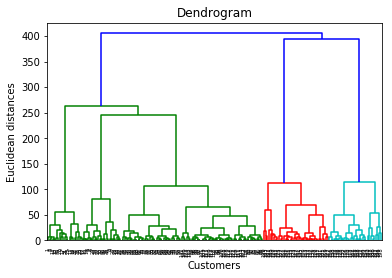

In [17]:
dendrogram= sch.dendrogram(sch.linkage(X,method='ward', metric= 'euclidean'))
#Dendrogram= Plots the hierarchical clustering as a dendrogram
#linkage= Performs hierarchical/agglomerative clustering
#Methods ‘ward’ are is defined only if Euclidean pairwise metric is used,
# ward minimizes the variance of the clusters being merged.
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [18]:
from sklearn.cluster import AgglomerativeClustering
hc= AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage='ward')
y_hc= hc.fit_predict(X)

affinity : string or callable, default: "euclidean"
    Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
    "manhattan", "cosine", or 'precomputed'.
    If linkage is "ward", only "euclidean" is accepted.

In [19]:
sum(y_hc==y_kmeans)

196

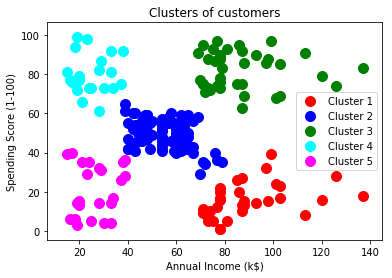

In [20]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
# X[y_hc==0,0]: row no= where y_hc = 0 and col_no : first col or 0th col , s= size and c= color
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# DB SCAN Clustering

In [21]:
from sklearn.cluster import DBSCAN

In [22]:
X= data.iloc[:,[3,4]].values

In [23]:
db= DBSCAN(eps=3, min_samples=4, metric='euclidean')

eps= Epsilon Distance
min_samples= Minimum point for a circle around core point
metric= to measure distance of point

In [24]:
model= db.fit(X)

In [25]:
label=model.labels_

-1 = Noise point or outliers
0-8 = no of clusters

In [26]:
a=  {i:i for i in label if i != -1}

In [27]:
n_cluster= len(a.keys())

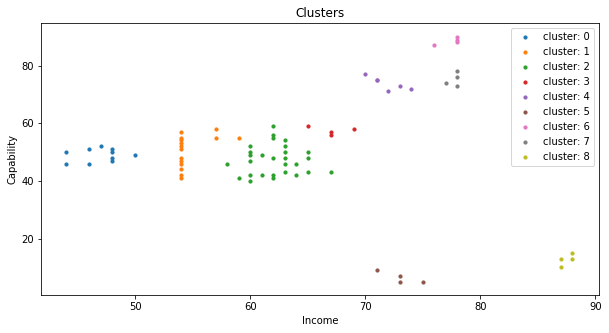

In [29]:
plt.figure(figsize=[10,5])
for i in range(0,n_cluster):
    plt.scatter(X[label==i,0], X[label==i,1], s=10, label= 'cluster: {}'.format(i) )

plt.xlabel('Income')
plt.ylabel('Capability')
plt.title('Clusters')
plt.legend(loc= 'upper right')
plt.show()

In [32]:
model.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])